In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
%cd '/content/drive/My Drive/Colab Notebooks/dive_into_code/GroupWork/ver3'

/content/drive/My Drive/Colab Notebooks/dive_into_code/GroupWork/ver3


In [24]:
!pip install keras==2.3.0
!pip install tensorflow==1.14.0
!pip install efficientnet
# !pip install tf-nightly

In [25]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import backend as K
# from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [174]:
K.clear_session()

IMG_SIZE = 112
NUM_CLASSES = 5
BATCH_SIZE = 5
PATH = '/content/drive/My Drive/Colab Notebooks/dive_into_code/GroupWork/ver3/'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')


# Efficientnet
efficientnet_url = "https://tfhub.dev/google/efficientnet/b0/feature-vector/1"
efficientnet_layer = hub.KerasLayer(efficientnet_url,
                                    input_shape=(IMG_SIZE,IMG_SIZE, 3))

# 学習済み重みは固定
efficientnet_layer.trainable = False

model = tf.keras.models.Sequential()
model.add(efficientnet_layer)
# model.add(layers.Dense(1024, activation=LeakyReLU(alpha=0.01)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(NUM_CLASSES, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="categorical_crossentropy",
              metrics=['mae', 'acc'])

#loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True)

model.summary()



train_datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False, 
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=2.0, 
        width_shift_range=5.0, 
        height_shift_range=5.0, 
        brightness_range=None, 
        shear_range=0.0, 
        zoom_range=0.0, 
        channel_shift_range=60.0, 
        fill_mode='nearest', 
        cval=0.0, 
        horizontal_flip=False, 
        vertical_flip=False, 
        rescale=1.0/255, 
        preprocessing_function=None, 
        data_format=None, 
        validation_split=0.0
        )

    # rescale=1.0 / 255,
    # shear_range=0.5,
    # zoom_range=0.2,
    # channel_shift_range=10,
    # horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              4049564   
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 2565      
Total params: 4,970,657
Trainable params: 921,093
Non-trainable params: 4,049,564
________________________________________

In [175]:
# 学習
history = model.fit_generator(
                train_generator, 
                steps_per_epoch=20, 
                validation_data=validation_generator, 
                validation_steps=5/BATCH_SIZE,
                epochs=60,
                shuffle=True)

model.save(os.path.join(PATH, 'EfficientNet/efficient02.hdf5'))
# model.save("my_model2.h5")

Epoch 1/60
20/20 [==============================] - 3s 149ms/step - loss: 1.3639 - mean_absolute_error: 0.3912 - acc: 0.4896 - val_loss: 0.3407 - val_mean_absolute_error: 0.1000 - val_acc: 1.0000
Epoch 2/60
20/20 [==============================] - 1s 71ms/step - loss: 0.5398 - mean_absolute_error: 0.1438 - acc: 0.8400 - val_loss: 0.0176 - val_mean_absolute_error: 0.0644 - val_acc: 1.0000
Epoch 3/60
20/20 [==============================] - 1s 72ms/step - loss: 0.2809 - mean_absolute_error: 0.1030 - acc: 0.8900 - val_loss: 2.5722e-04 - val_mean_absolute_error: 0.0487 - val_acc: 1.0000
Epoch 4/60
20/20 [==============================] - 1s 65ms/step - loss: 0.2018 - mean_absolute_error: 0.0903 - acc: 0.9271 - val_loss: 3.3453e-04 - val_mean_absolute_error: 0.0391 - val_acc: 1.0000
Epoch 5/60
20/20 [==============================] - 1s 67ms/step - loss: 0.2241 - mean_absolute_error: 0.0695 - acc: 0.9479 - val_loss: 9.5318e-05 - val_mean_absolute_error: 0.0084 - val_acc: 1.0000
Epoch 6/60
2

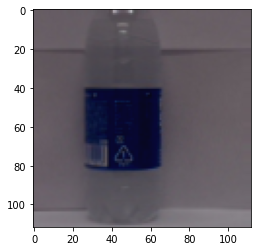

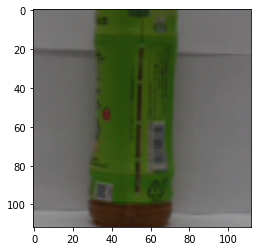

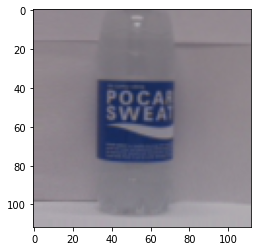

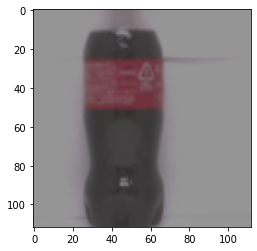

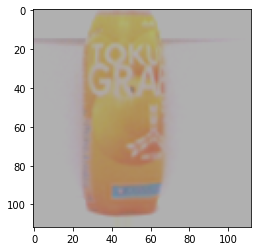

In [ ]:
# 画像確認用
for imgs, _ in train_generator:
    for img in imgs:
        plt.imshow(img)
        plt.show()
    break

[[9.9877614e-01 3.7715559e-08 0.0000000e+00 1.8952426e-06 0.0000000e+00]]
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}
0
softmax 
 [[0.40431476 0.14892124 0.14892124 0.14892152 0.14892124]]


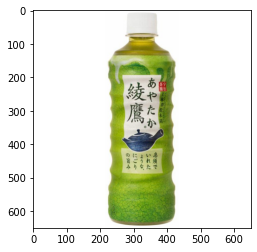

In [179]:
# 検出テスト用
test_img = os.path.join(PATH, '../test', 'ayataka.jpg')
with Image.open(test_img) as img:
    plt.imshow(img)
    img = np.asarray(img.convert('RGB').resize((IMG_SIZE, IMG_SIZE)))[np.newaxis, :, :, :] / 255
    pred = model.predict_proba(img)

print(pred)
print(train_generator.class_indices)
for key, val in train_generator.class_indices.items():
    if val == np.argmax(pred):
        print(key)


def softmax(a):
    x = np.exp(a)
    u = np.sum(x)
    return x/u

print('softmax \n', softmax(pred))

## オートエンコーダー

In [111]:
from matplotlib import pyplot as plt
from matplotlib import cm
# バックエンドに依存したチャネルの位置を調整する


# 畳み込み演算を用いた AutoEncoder のネットワーク (Sequential API)
input_shape = (112, 112, 3)
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(64, kernel_size=(3, 3),
                        activation='relu', padding='same',
                        input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(layers.Conv2D(32, kernel_size=(3, 3),
                        activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(layers.Conv2D(16, kernel_size=(3, 3),
                        activation='relu', padding='same'))
model.add(layers.UpSampling2D(size=(2, 2)))
model.add(layers.Conv2D(32, kernel_size=(3, 3),
                        activation='relu', padding='same'))
model.add(layers.UpSampling2D(size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3),
                        activation='relu', padding='same'))
# model.add(layers.UpSampling2D(size=(2, 2)))
model.add(layers.Conv2D(3, kernel_size=(3, 3),
                        activation='sigmoid', padding='same'))

model.compile(optimizer='adam',
                loss='binary_crossentropy')

# モデルの構造を確認する
print(model.summary())

# fit_callbacks = [
#     callbacks.EarlyStopping(monitor='val_loss',
#                             patience=5,
#                             mode='min')
# ]


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 112, 112, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 56, 56, 32)        18464     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 16)        4624      
_________________________________________________________________
up_sampling2d_9 (UpSampling2 (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 56, 56, 32)       

In [202]:
K.clear_session()
input_img = tf.keras.Input(shape=(112, 112, 3))

x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 112, 112, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 112, 112, 512)     14336     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 512)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 256)       1179904   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0     

In [203]:
IMG_SIZE = 112
NUM_CLASSES = 5
BATCH_SIZE = 1
PATH = '/content/drive/My Drive/Colab Notebooks/dive_into_code/GroupWork/ver3/'
train_dir = os.path.join(PATH, 'ae_train_0')
validation_dir = os.path.join(PATH, 'ae_validation_0')

train_datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False, 
        zca_whitening=False, 
        zca_epsilon=1e-06,
        rotation_range=2.0, 
        width_shift_range=5.0, 
        height_shift_range=5.0, 
        brightness_range=None, 
        shear_range=0.0, 
        zoom_range=0.0, 
        channel_shift_range=60.0, 
        fill_mode='nearest', 
        cval=0.0, 
        horizontal_flip=False, 
        vertical_flip=False, 
        rescale=1.0/255, 
        preprocessing_function=None, 
        data_format=None, 
        validation_split=0.0
        )

    # rescale=1.0 / 255,
    # shear_range=0.5,
    # zoom_range=0.2,
    # channel_shift_range=10,
    # horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    # color_mode='grayscale',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='input')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    # color_mode='grayscale',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='input')


# テストデータの損失を確認しておく
# score = model.evaluate(x_test, x_test, verbose=0)
# print('test xentropy:', score)

Found 33 images belonging to 1 classes.
Found 1 images belonging to 1 classes.


In [204]:
# 学習
history = autoencoder.fit_generator(
                train_generator, 
                steps_per_epoch=20, 
                validation_data=validation_generator, 
                validation_steps=5/BATCH_SIZE,
                epochs=60,
                shuffle=True)

Epoch 1/60
20/20 [==============================] - 6s 289ms/step - loss: 0.6893 - val_loss: 0.7324
Epoch 2/60
20/20 [==============================] - 5s 236ms/step - loss: 0.6949 - val_loss: 0.6929
Epoch 3/60
20/20 [==============================] - 5s 233ms/step - loss: 0.6929 - val_loss: 0.6857
Epoch 4/60
20/20 [==============================] - 5s 231ms/step - loss: 0.6893 - val_loss: 0.7649
Epoch 5/60
20/20 [==============================] - 5s 237ms/step - loss: 0.6854 - val_loss: 0.7010
Epoch 6/60
20/20 [==============================] - 5s 237ms/step - loss: 0.6866 - val_loss: 0.6893
Epoch 7/60
20/20 [==============================] - 5s 235ms/step - loss: 0.6946 - val_loss: 0.6907
Epoch 8/60
20/20 [==============================] - 5s 230ms/step - loss: 0.6920 - val_loss: 0.6897
Epoch 9/60
20/20 [==============================] - 5s 230ms/step - loss: 0.6837 - val_loss: 0.6886
Epoch 10/60
20/20 [==============================] - 5s 234ms/step - loss: 0.6940 - val_loss: 0.6907

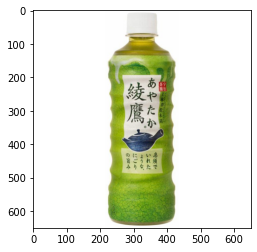

0.016117635516446297


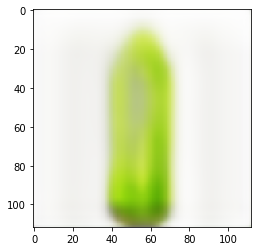

In [205]:
from sklearn.metrics import mean_squared_error as mse
# 検出テスト用
test_img = os.path.join(PATH, '../test', 'ayataka.jpg')
# test_img = os.path.join(PATH, '../train/grape', 'grapefruits_5.jpg')
with Image.open(test_img) as img:
    plt.imshow(img)
    plt.show()
    img = np.asarray(img.convert('RGB').resize((IMG_SIZE, IMG_SIZE)))[np.newaxis, :, :, :] / 255
    pred = autoencoder.predict(img)
    print(mse(img.reshape(112*112, -1), pred.reshape(112*112, -1)))
    plt.imshow(pred.squeeze())
    plt.show()
# 選びだしたサンプルを AutoEncoder にかける
# ae_pred = model.predict_proba(x_test_sampled, verbose=0)

In [146]:
cp ./train/1/* ../train/cola/

In [81]:
# 学習
history = autoencoder.fit_generator(
                train_generator, 
                steps_per_epoch=20, 
                validation_data=validation_generator, 
                validation_steps=5/BATCH_SIZE,
                epochs=60,
                shuffle=True)

# model.save(os.path.join(PATH, 'EfficientNet/efficient02.hdf5'))
# model.save("my_model2.h5")

Epoch 1/60


ValueError: ignored

In [ ]:
# 検出テスト用
test_img = os.path.join(PATH, '../train/cola', 'cola_5.jpg')
with Image.open(test_img) as img:
    plt.imshow(img)
    plt.show()
    img = np.asarray(img.convert('RGB').resize((IMG_SIZE, IMG_SIZE)))[np.newaxis, :, :, :] / 255
    pred = autoencoder.predict(img)
    plt.imshow(img)
    plt.show()

 # 出力画像の取得
# decoded_imgs = autoencoder.predict(x_test)
 
# サンプル画像表示
# n = 6
# plt.figure(figsize=(12, 4))
# for i in range(n):
#     # テスト画像を表示
#     ax = plt.subplot(2, n, i+1)
#     plt.imshow(x_test[i].reshape(28, 28))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
 
#     # 出力画像を表示
#     ax = plt.subplot(2, n, i+1+n)
#     plt.imshow(decoded_imgs[i].reshape(28, 28))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# plt.savefig("result.png")
# plt.show()

In [ ]:
import os
from pathlib import Path
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
# from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import pickle


IMG_SIZE = 112
PATH = '/content/drive/My Drive/Colab Notebooks/dive_into_code/GroupWork'
MODEL_PATH = os.path.join(PATH, 'EfficientNet/efficient02.hdf5')


class EfficientnetModel:
    def __init__(self):
        self.model = self.load_model()
        # self.classes = {'cola': 0, 'gogo': 1, 'grape': 2, 'heytea': 3, 'pocari': 4}
        self.classes = {0: 'cola', 1: 'gogo', 2: 'grape', 3: 'heytea', 4: 'pocari'}
        self.map = {0: 3, 1: 0, 2: 2, 3: 1, 4: 4}    # {efficient-classes: item-master}

    def predict(self, img_path):
        with Image.open(img_path) as img:
            # 中心座標を計算
            new_size = 112
            center_x = int(img.width / 2)
            center_y = int(img.height / 2)
            # トリミング
            img = img.crop((center_x - new_size / 2, center_y - new_size / 2, center_x + new_size / 2, center_y + new_size / 2))
            img = np.asarray(img.convert('RGB').resize((112, 112)))[np.newaxis, :, :, :] / 255
            pred = self.model.predict_proba(img)
            print(pred)
        # return pred, self.classes[np.argmax(pred)]
        return pred

    def predict2(self, img_path):
        self.predict(img_path)


    def predict_save(self, img_path, label):
        pred, class_ = self.predict(img_path)
        data = np.zeros((1,6))
        data[:, :5] = pred
        data[:, 5] = label
        self.write_data(data)
        return pred, class_


    def img_trim(self, img):
        # 元画像が入ったディレクトリ
        p = Path('validation/z_cal')
        src_img_list = list(p.glob('*.jpg'))

        # トリミングのサイズ(ピクセル)
        new_size = 112

        for i, src_img in enumerate(src_img_list):

            # 画像読み込み
            img = Image.open(src_img)

            # 中心座標を計算
            center_x = int(img.width / 2)
            center_y = int(img.height / 2)

            # トリミング
            img_crop = img.crop((center_x - new_size / 2, center_y - new_size / 2, center_x + new_size / 2, center_y + new_size / 2))


    def write_data(self, add_data): 
        PKL_PATH = './scan_results_false.pkl' 
        is_file = os.path.exists(PKL_PATH)    # ファイルの有無(真偽)を保持
        data = []
        # ファイルが既に存在する場合はファイル内のデータの最後に
        # 今回のパラメータを追加して、data変数へ格納
        if is_file:
            with open(PKL_PATH, 'rb') as f:
                data = pickle.load(f)
                data.append(add_data)
        # ファイルが存在しない場合は空のリストへ追加
        else:
            data.append(add_data)
        # 変数データを対象のファイルへ書き込み
        with open(PKL_PATH, 'wb') as f:
            pickle.dump(data, f)
        del data, add_data, PKL_PATH


    def load_model(self):
        K.clear_session()
        # efficientnet_url = "https://tfhub.dev/google/efficientnet/b0/feature-vector/1"
        # efficientnet_layer = hub.KerasLayer(efficientnet_url,
        #                             input_shape=(IMG_SIZE,IMG_SIZE,3))
        # # 学習済み重みは固定
        # efficientnet_layer.trainable = False

        # model = tf.keras.models.Sequential()
        # model.add(efficientnet_layer)
        # model.add(layers.Dense(1024, activation=LeakyReLU(alpha=0.01)))
        # model.add(layers.Dropout(0.4))
        # model.add(layers.Dense(5, activation='sigmoid'))

        # model.compile(optimizer=tf.keras.optimizers.Adam(),
        #               loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        #               metrics=['mae', 'acc'])   
        # model.load_weights(MODEL_PATH)
        model = load_model("../EfficientNet/efficient02.hdf5", custom_objects={"KerasLayer": hub.KerasLayer})
        return model

In [ ]:
eff = EfficientnetModel()

In [ ]:
test_img = os.path.join(PATH, 'test', 'poka.jpg')
# eff.predict_save(test_img, 0)
eff.predict(test_img)

[[0.00114887 0.00045783 0.00202997 0.00070872 0.00384287 0.0033982 ]]


array([[0.00114887, 0.00045783, 0.00202997, 0.00070872, 0.00384287,
        0.0033982 ]], dtype=float32)

In [ ]:
cd ../z_red/

/content/drive/My Drive/Colab Notebooks/dive_into_code/GroupWork/ver2/train/z_red


In [ ]:
!wget 'https://msp.c.yimg.jp/images/v2/FUTi93tXq405grZVGgDqG6Y57jUvVszJMWIC6JcZkY8E7kIim5t5jlFMgvDdT80ozaXKgMelJwdEsqYi9JUIc65ghTyjNhNaNS9Kb4WYtIteQCJBebn62rzScXBE0l1UMmZzRHYjrWEhlKIFHNRX7zK6ORpzPf7OFpD40n_M3-zLRyATXASUlp41zBDZjaDkZVG-MtQm6HBJgnSnUHkajPRQq2saBLD-qF2bkCBy55ghPLQogKRDqQYPk-LTeG-5SU9udlXFAUbcjbrLoQQAPYz0-kdKhTK1vGzBC7f8wUA=/4901777271951.jpg'

--2020-10-18 01:01:21--  https://msp.c.yimg.jp/images/v2/FUTi93tXq405grZVGgDqG6Y57jUvVszJMWIC6JcZkY8E7kIim5t5jlFMgvDdT80ozaXKgMelJwdEsqYi9JUIc65ghTyjNhNaNS9Kb4WYtIteQCJBebn62rzScXBE0l1UMmZzRHYjrWEhlKIFHNRX7zK6ORpzPf7OFpD40n_M3-zLRyATXASUlp41zBDZjaDkZVG-MtQm6HBJgnSnUHkajPRQq2saBLD-qF2bkCBy55ghPLQogKRDqQYPk-LTeG-5SU9udlXFAUbcjbrLoQQAPYz0-kdKhTK1vGzBC7f8wUA=/4901777271951.jpg
Resolving msp.c.yimg.jp (msp.c.yimg.jp)... 182.22.25.252
Connecting to msp.c.yimg.jp (msp.c.yimg.jp)|182.22.25.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3944 (3.9K) [image/jpeg]
Saving to: ‘4901777271951.jpg’

4901777271951.jpg   100%[===================>]   3.85K  --.-KB/s    in 0s      

2020-10-18 01:01:22 (139 MB/s) - ‘4901777271951.jpg’ saved [3944/3944]



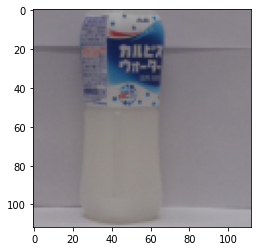

In [ ]:
from PIL import Image
from pathlib import Path

# 元画像が入ったディレクトリ
p = Path('validation/z_cal')
src_img_list = list(p.glob('*.jpg'))

# トリミングのサイズ(ピクセル)
new_size = 112

for i, src_img in enumerate(src_img_list):

    # 画像読み込み
    img = Image.open(src_img)

    # 中心座標を計算
    center_x = int(img.width / 2)
    center_y = int(img.height / 2)

    # トリミング
    img_crop = img.crop((center_x - new_size / 2, center_y - new_size / 2, center_x + new_size / 2, center_y + new_size / 2))

    # 表示
    plt.imshow(img_crop)
    plt.show()

    # トリミングした画像を保存
    img_crop.save('validation/z_cal/cal' + str(i) + '.jpg', 'JPEG', quality=100, optimize=True)

In [ ]:
cp -rp ../train/cola ./train/

In [ ]:
ll ./train/cola/

total 1163
-rw-------+ 1 root 78891 Oct 13 15:42 cola_10.jpg
-rw-------+ 1 root 79052 Oct 13 15:42 cola_11.jpg
-rw-------+ 1 root 79194 Oct 13 15:42 cola_12.jpg
-rw-------+ 1 root 78755 Oct 13 15:42 cola_13.jpg
-rw-------+ 1 root 79105 Oct 13 15:42 cola_14.jpg
-rw-------+ 1 root 79071 Oct 13 15:42 cola_15.jpg
-rw-------+ 1 root 78861 Oct 13 15:42 cola_16.jpg
-rw-------+ 1 root 79646 Oct 12 20:16 cola_1.jpg
-rw-------+ 1 root 79360 Oct 12 20:16 cola_2.jpg
-rw-------+ 1 root 79071 Oct 12 20:17 cola_3.jpg
-rw-------+ 1 root 79129 Oct 12 20:16 cola_4.jpg
-rw-------+ 1 root 79167 Oct 13 15:42 cola_5.jpg
-rw-------+ 1 root 79084 Oct 13 15:42 cola_6.jpg
-rw-------+ 1 root 78934 Oct 13 15:42 cola_7.jpg
-rw-------+ 1 root 79453 Oct 13 15:42 cola_9.jpg


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.engine.topology import Layer
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.models import Sequential
from keras.layers import Activation 
from keras.layers import Input, Dense, GlobalAveragePooling2D
import efficientnet.keras as efn

K.clear_session()

class Generator_xandy(object):
    def __init__(self):
        train_dir='train'
        test_dir="validation"
        batch_size=5
        datagen = ImageDataGenerator(zoom_range=[0.95, 1.0],width_shift_range =0.1,height_shift_range=0.1, brightness_range=[0.95, 1.05], rescale=1/255.)

        train_gen = datagen.flow_from_directory(
            train_dir,
            target_size=(112, 112),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=True,
            subset = "training" 
        )

        self.gene = train_gen

    def __iter__(self):

        return self

    def __next__(self): 
        X, Y = self.gene.next()
        #元はreturn X, Y
        return [X,Y], Y

train_generator=Generator_xandy()
val_generator=Generator_xandy()


#arcface layerの実装
class Arcfacelayer(Layer):
    def __init__(self, output_dim, s=30, m=0.50, easy_magin=False):
        self.output_dim = output_dim
        self.s = s
        self.m = m
        self.easy_magin = easy_magin
        super(Arcfacelayer, self).__init__()

    def build(self, input_shape):
        # Create a trainable weight variable for this layer.
        self.kernel = self.add_weight(name='kernel',
                                      shape=(input_shape[0][1], self.output_dim),
                                      initializer='uniform',
                                      trainable=True)
        super(Arcfacelayer, self).build(input_shape)

    def call(self, x):
        y = x[1]
        x_normalize = tf.math.l2_normalize(x[0]) #|x = x'/ ||x'||2
        k_normalize = tf.math.l2_normalize(self.kernel) # Wj = Wj' / ||Wj'||2

        cos_m = K.cos(self.m)
        sin_m = K.sin(self.m)
        th = K.cos(np.pi - self.m)
        mm = K.sin(np.pi - self.m) * self.m

        cosine = K.dot(x_normalize, k_normalize) # W.Txの内積

        sine = K.sqrt(1.0 - K.square(cosine))
        phi = cosine * cos_m - sine * sin_m

        if self.easy_magin:
            phi = tf.where(cosine > 0, phi, cosine) 

        else:
            phi = tf.where(cosine > th, phi, cosine - mm) 

        output = (y * phi) + ((1.0 - y) * cosine) # true cos(θ+m), False cos(θ)
        output *= self.s

        return output

    def compute_output_shape(self, input_shape):

        return (input_shape[0][0], self.output_dim)


n_categories=5
#B3の部分をB0~B7と変えるだけでモデルを変更可能
base_model = efn.EfficientNetB0(input_shape=(112,112,3), weights="imagenet",include_top=False)

#ArcFaceLayerをくっつける
x = base_model.output
yinput = Input(shape=(n_categories,))
hidden = GlobalAveragePooling2D()(x)
x = Arcfacelayer(5, 40, 0.05)([hidden,yinput])
prediction = Activation('softmax')(x)
efn_model = Model(inputs=[base_model.input,yinput],outputs=prediction)

efn_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

efn_model.summary()

#学習
# modelcheckpoint = tf.keras.callbacks.ModelCheckpoint()
efn_model.fit_generator(train_generator, steps_per_epoch=5, epochs=30, verbose=1, 
                         validation_data=val_generator, validation_steps=5, class_weight=None, max_queue_size=10, workers=1, 
                        use_multiprocessing=False, 
                        shuffle=True, initial_epoch=0)

Found 74 images belonging to 5 classes.
Found 74 images belonging to 5 classes.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 112, 112, 3)  0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 56, 56, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 56, 56, 32)   128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (

classes=['cola', 'gogo', 'grape', 'heytea','pocari']

In [ ]:
def get_hold_vector(model, classes=[0,1,2,3,4]):
    """
    classes: クラス名のリスト　イメージの名前はこのリスト名にしてください
    hold_dir: str イメージが入ったフォルダpath
    """

    hold_vector=np.zeros((5,1280))
    train_path="./train/"

    for clas in classes:
        img_array = np.empty((0, 112,112,3))
        for i in range(10):
            imagepath=glob.glob("./train/{}/*".format(clas))[i]

            img = load_img(imagepath, target_size=(112,112))
            array = img_to_array(img).reshape(1, 112, 112, 3)
            img_array = np.vstack((img_array, array))


        img_array = img_array/255.0
        vector = model.predict(img_array)
        vector=vector.mean(axis=0)
        hold_vector[clas-1, :]=vector
    return hold_vector
#予測用のモデル
predict_model=Model(efn_model.get_layer(index=0).input, efn_model.get_layer(index=-4).output)
predict_model.save("models.h5")

#学習データ（5種類のペットボトル）のベクトル
hold_vector=get_hold_vector(model=predict_model)
np.save(
    "hold_vector.npy", # データを保存するファイル名
    hold_vector,  # 配列型オブジェクト（listやnp.array)
)